In [5]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS

from sklearn.externals import joblib
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [6]:
with open("./sentiment_text.pkl", 'rb') as picklefile: 
    sentiment_text = pickle.load(picklefile)

# How do we check if the data we scraped makes sense? Let's see the top 30 words for negative, positive, and neutral reviews.

In [7]:
sentiment_text.head()

,airline_sentiment,text
0,1,what dhepburn said
1,1,plus youve added commercials to the experience tacky
2,1,i didnt today must mean i need to take another trip
3,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,0,and its a really big bad thing about it


In [8]:
X = sentiment_text['text']
y = sentiment_text['airline_sentiment']

## CV for Word Count

In [9]:
cv_all = CountVectorizer(stop_words='english')
X_cv_all = cv_all.fit_transform(X)

cv_all_df = pd.DataFrame(X_cv_all.toarray(), columns=cv_all.get_feature_names())
cv_all_df

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zkatcher,zombie,zone,zones,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## top 30 words for neg vs positive/neutral comments

### neg comments

In [10]:
mask_neg = (y==0)
neg_matrix = cv_all_df[mask_neg]

In [11]:
neg_matrix.sum(axis = 0).sort_values(ascending=False)

flight             3909
cancelled          901 
service            736 
hours              637 
just               613 
help               603 
hold               602 
customer           599 
time               579 
im                 527 
plane              516 
delayed            486 
amp                473 
hour               439 
bag                403 
dont               403 
gate               401 
late               374 
need               370 
phone              358 
waiting            334 
united             321 
thanks             304 
got                294 
airline            289 
like               288 
trying             287 
ive                284 
delay              267 
wait               264 
                  ...  
elpaso             0   
elp                0   
ellas              0   
ellamae            0   
prospective        0   
elizabeth          0   
eliza              0   
eliz               0   
elevator           0   
elevategold        0   
provo           

### pos comments

In [12]:
mask_pos = (y==1)
pos_matrix = cv_all_df[mask_pos]

In [13]:
pos_matrix.sum(axis = 0).sort_values(ascending=False)

flight                1271
thanks                749 
thank                 518 
just                  345 
great                 249 
help                  243 
service               212 
im                    206 
time                  183 
love                  180 
need                  179 
amp                   163 
got                   160 
today                 155 
dm                    153 
guys                  153 
know                  153 
good                  150 
flying                146 
customer              141 
fly                   135 
like                  134 
way                   133 
cancelled             133 
new                   129 
tomorrow              129 
best                  127 
fleek                 121 
fleets                115 
united                108 
                     ...  
gmailcom              0   
gmas                  0   
gng                   0   
gnight                0   
gin                   0   
gills                 0   
r

## wordcloud to visualize data

### neg comments

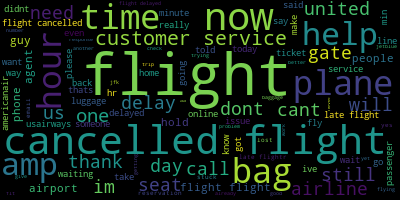

In [14]:
long_string = ','.join(list(sentiment_text.loc[mask_neg,'text'].values))
wordcloud = WordCloud(background_color = 'black', max_words = 100,
                     contour_width = 3, contour_color = 'steelblue',
                     random_state = 4)
wordcloud.generate(long_string)
wordcloud.to_image()

### pos comments

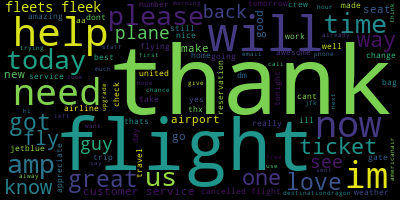

In [15]:
long_string = ','.join(list(sentiment_text.loc[mask_pos,'text'].values))
wordcloud = WordCloud(background_color = 'black', max_words = 100,
                     contour_width = 3, contour_color = 'steelblue',
                     random_state = 4)
wordcloud.generate(long_string)
wordcloud.to_image()

# NMF Topic Modeling by Sentiment

In [16]:
# separating text by sentiment
X_neg = X[y==0]
X_pos = X[y==1]
X_sentiment = [X_neg, X_pos]

In [17]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

#### creating tfidf by sentiment, ngram = 1 

In [18]:
# creating tfidf by sentiment
X_tfidf_model = [] #stores tfidf model
X_tfidf_df = [] #stores document matrix
X_sentiment_transformed= [] #transformed X

for sentiment in X_sentiment:
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf = tfidf.fit(sentiment)
    X = tfidf.transform(sentiment)

    X_tfidf = pd.DataFrame(X.toarray(), index=sentiment, columns=tfidf.get_feature_names())
    
    X_tfidf_model.append(tfidf)
    X_tfidf_df.append(X_tfidf)
    X_sentiment_transformed.append(X)    

#### creating tfidf by sentiment, n-grams = 2

In [19]:
X_tfidf_model_2ngrams = [] #stores tfidf model
X_tfidf_df_2ngrams = [] #stores document matrix
X_sentiment_transformed_2ngrams= [] #transformed X

for sentiment in X_sentiment:
    tfidf = TfidfVectorizer(stop_words='english',ngram_range=(2,2))
    tfidf = tfidf.fit(sentiment)
    X = tfidf.transform(sentiment)
    X_tfidf_2ngrams = pd.DataFrame(X.toarray(), index=sentiment, columns=tfidf.get_feature_names())
    
    X_tfidf_model_2ngrams.append(tfidf)
    X_tfidf_df_2ngrams.append(X_tfidf_2ngrams)
    X_sentiment_transformed_2ngrams.append(X)    

## Topic Modeling with NMF


### using tfidf n-grams = 1

In [20]:
from sklearn.decomposition import NMF
# def nmf_modelling_by_sentiment (topics)

nmf_model = [] #stores nmf model
nmf_df = [] #stores document matrix
nmf_X_transformed = [] #stores transformed X

for i in range(0,2):
    nmf= NMF(7, random_state=4)
    nmf = nmf.fit(X_sentiment_transformed[i])
    topics = nmf.transform(X_sentiment_transformed[i])
    topic_word = pd.DataFrame(nmf.components_.round(5),
             columns = X_tfidf_model[i].get_feature_names())
    
    nmf_model.append(nmf)
    nmf_X_transformed.append(topics)
    nmf_df.append(topic_word)
    
    if i==0:
        print('\n'+ 'Negative')
        display_topics(nmf, X_tfidf_model[i].get_feature_names(), 5)
    if i==1:
        print('\n'+ 'Positive or Neutral')
        display_topics(nmf, X_tfidf_model[i].get_feature_names(), 5)



Negative

Topic  0
flight, cancelled, late, tomorrow, today

Topic  1
service, customer, terrible, poor, worst

Topic  2
hold, minutes, hour, ive, hours

Topic  3
plane, waiting, gate, hour, sitting

Topic  4
help, just, im, need, bag

Topic  5
hours, delayed, late, flightr, flight

Topic  6
worst, airline, time, experience, fly

Positive or Neutral

Topic  0
thank, response, ok, appreciate, okay

Topic  1
thanks, got, awesome, reply, response

Topic  2
flight, cancelled, tomorrow, time, need

Topic  3
fleek, fleets, rt, lol, smh

Topic  4
dm, follow, need, best, send

Topic  5
great, service, customer, love, guys

Topic  6
sent, just, help, dm, email


### using tfidf n-grams=2

7 topics for negatives, and 3 topics for positives were representative of the customer tweets.

In [21]:
from sklearn.decomposition import NMF
# def nmf_modelling_by_sentiment (topics)

nmf_model_2ngrams = [] #stores nmf model
nmf_df_2ngrams = [] #stores document matrix
nmf_X_transformed_2ngrams = [] #stores transformed X

for i in range(0,2):
    nmf= NMF(7, random_state=4)
    nmf = nmf.fit(X_sentiment_transformed_2ngrams[i])
    topics_2ngram = nmf.transform(X_sentiment_transformed_2ngrams[i])
    topic_word = pd.DataFrame(nmf.components_.round(5),
             columns = X_tfidf_model_2ngrams[i].get_feature_names())
    
    nmf_model_2ngrams.append(nmf)
    nmf_X_transformed_2ngrams.append(topics_2ngram)
    nmf_df_2ngrams.append(topic_word)
    
    if i==0:
        print('\n'+ 'Negative')
        display_topics(nmf, X_tfidf_model_2ngrams[i].get_feature_names(), 5)
    if i==1:
        print('\n'+ 'Positive or Neutral')
        display_topics(nmf, X_tfidf_model_2ngrams[i].get_feature_names(), 5)


Negative

Topic  0
flight flight, cancelled flight, flight tomorrow, just cancelled, rebook cancelled

Topic  1
customer service, worst customer, poor customer, terrible customer, service experience

Topic  2
late flight, hours late, flight late, flight crew, hour late

Topic  3
flight cancelled, cancelled flight, flight today, rebook flight, flight help

Topic  4
fleets fleek, rt fleets, fleek lt, sir rt, hate rt

Topic  5
flight delayed, delayed flight, delayed hours, delayed hour, connecting flight

Topic  6
hold hours, ive hold, hold hour, booking problems, hold minutes

Positive or Neutral

Topic  0
fleets fleek, fleek lol, fleek happened, fleek smh, dont fleets

Topic  1
passengers wall, appease passengers, wall street, battles appease, ceo battles

Topic  2
follow dm, need follow, dm info, pls follow, dm guys

Topic  3
just sent, sent dm, thanks just, thank just, dm details

Topic  4
rt fleets, fleets fleek, xx rt, stop rt, welllllll rt

Topic  5
cancelled flight, flight tomorr

## NMF with TFIDF n-grams = 2 was my best Topic Model

### pickle

In [44]:
joblib.dump(X_tfidf_model_2ngrams, './tfidf_model_2ngrams.pkl')
joblib.dump(nmf_model_2ngrams, './nmf_model_2ngrams.pkl')

['./nmf_model_2ngrams.pkl']